Laptop Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#1. Collecting Data
full_data = pd.read_csv("./Data/laptop_price.csv", encoding='ISO-8859-1')

In [4]:
full_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
full_data.shape


(1303, 13)

In [6]:
#2. Cleaning Data - checking for null values
full_data.isnull().any()

laptop_ID           False
Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price_euros         False
dtype: bool

In [7]:
print(f'There are {full_data.shape[0]} rows and {full_data.shape[1]} columns with no null values.')

There are 1303 rows and 13 columns with no null values.


In [8]:
#  2.1 Train-test-validation split
!pip install fast_ml --upgrade
from fast_ml.model_development  import train_valid_test_split

In [12]:
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(full_data, 
                                target = 'Price_euros', train_size=0.80, valid_size=0.1, test_size=0.1)

print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(1042, 12)
(1042,)
(130, 12)
(130,)
(131, 12)
(131,)


(None, None)

In [46]:
# putting x & y back together for plotting
train_data = pd.concat([x_train, y_train], axis=1)

In [47]:
train_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
679,687,Acer,Aspire VX5-591G,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,16GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1299.00
946,960,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
91,93,Acer,Aspire 5,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,689.00
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,1599.00
1034,1048,HP,EliteBook 850,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.84kg,1228.99


In [15]:
#2.2 Visualizations

In [16]:
train_data.shape

(1042, 13)

In [23]:
train_data.columns


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [17]:
train_data.loc[:, 'Company'].nunique()

19

In [18]:
train_data.loc[:, 'TypeName'].nunique()

6

In [19]:
train_data.loc[:, 'Cpu'].nunique()

106

In [20]:
train_data.loc[:, 'Ram'].nunique()

9

In [21]:
train_data.loc[:, 'Memory'].nunique()

38

In [22]:
train_data.loc[:, 'Gpu'].nunique()

103

In [24]:
avg_price_by_company = full_data.groupby("Company").mean()['Price_euros'].sort_values(ascending=False)
avg_price_by_type = full_data.groupby("TypeName").mean()['Price_euros'].sort_values(ascending=False)
avg_price_by_ram = full_data.groupby("Ram").mean()['Price_euros'].sort_values(ascending=False)
avg_price_by_cpu = full_data.groupby("Cpu").mean()['Price_euros'].sort_values(ascending=False)
avg_price_by_memory = full_data.groupby("Memory").mean()['Price_euros'].sort_values(ascending=False)

In [25]:
avg_price_by_company.describe().round()

count      19.0
mean     1258.0
std       724.0
min       217.0
25%       898.0
50%      1186.0
75%      1588.0
max      3346.0
Name: Price_euros, dtype: float64

In [26]:
avg_price_by_type.describe().round()

count       6.0
mean     1377.0
std       614.0
min       636.0
25%       907.0
50%      1415.0
75%      1686.0
max      2280.0
Name: Price_euros, dtype: float64

In [27]:
avg_price_by_ram.describe().round()

count       9.0
mean     1711.0
std      1296.0
min       254.0
25%       615.0
50%      1239.0
75%      2206.0
max      3975.0
Name: Price_euros, dtype: float64

In [28]:
avg_price_by_cpu.describe().round()

count     118.0
mean     1107.0
std       865.0
min       199.0
25%       434.0
50%       931.0
75%      1503.0
max      4899.0
Name: Price_euros, dtype: float64

In [29]:
avg_price_by_memory.describe().round()

count      39.0
mean     1332.0
std       924.0
min       224.0
25%       638.0
50%      1222.0
75%      1853.0
max      3624.0
Name: Price_euros, dtype: float64

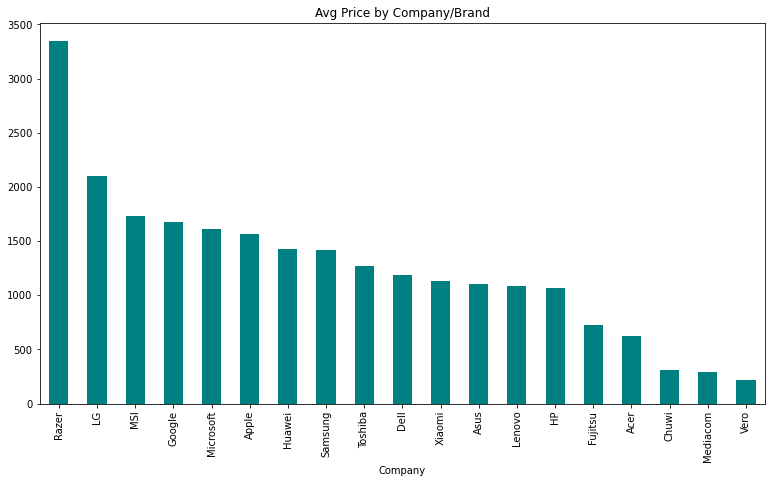

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=(13,7))

avg_price_by_company.plot(ax=ax, kind='bar', color='teal')
ax.set_title('Avg Price by Company/Brand')

fig;

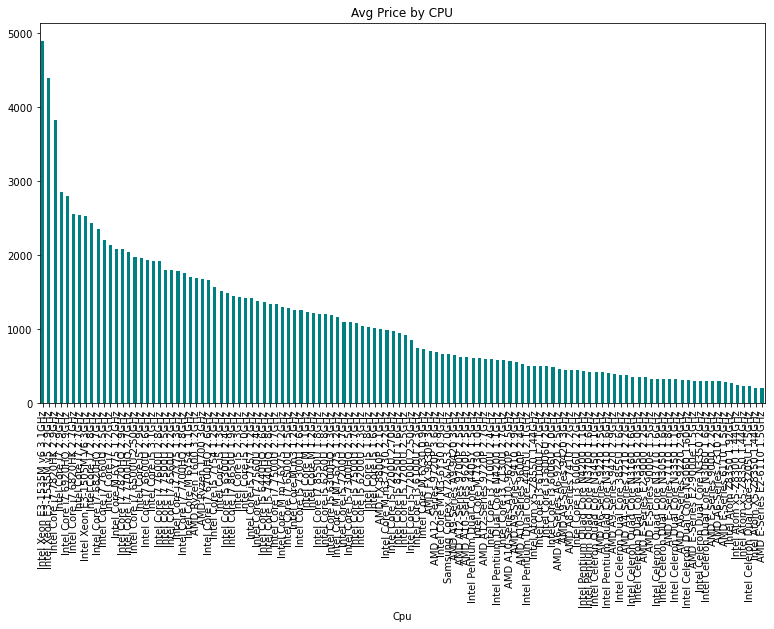

In [34]:
fig, ax = plt.subplots(nrows=1, figsize=(13,7))

avg_price_by_cpu.plot(ax=ax, kind='bar', color='teal')
ax.set_title('Avg Price by CPU')
ax.xlimit=[0, 50]

fig;

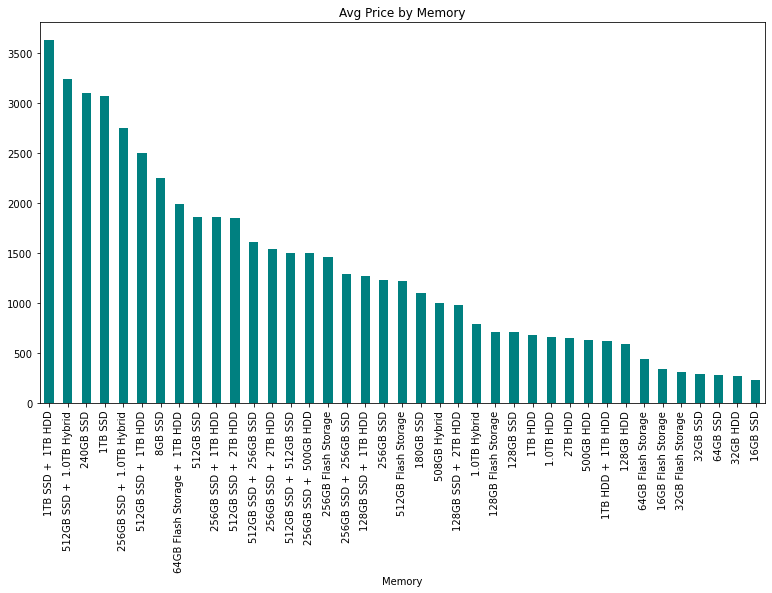

In [107]:
fig, ax = plt.subplots(nrows=1, figsize=(13,7))

avg_price_by_memory.plot(ax=ax, kind='bar', color='teal')
ax.set_title('Avg Price by Memory')

fig;

In [108]:
train_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
331,337,Toshiba,Satellite Pro,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.0kg,943.00
167,171,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,1060.49
749,758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16GB,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,4389.00
602,609,Acer,Aspire 1,Notebook,14.0,Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.6kg,329.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97


The "Company" column naming the brand of laptop could be interesting. Maybe there is one "rock star" brand which costs drastically more than the other brands. 

There is definitely a large spread between the brands. Some have an average price which is 15times more than the others.

In [110]:
train_data.groupby("Company")["Price_euros"].mean().round().sort_values(ascending=False)

Company
Razer        3346.0
LG           2099.0
MSI          1742.0
Google       1737.0
Microsoft    1704.0
Samsung      1522.0
Huawei       1424.0
Apple        1354.0
Toshiba      1268.0
Dell         1201.0
Xiaomi       1200.0
Asus         1132.0
Lenovo       1118.0
HP           1093.0
Fujitsu       694.0
Acer          634.0
Chuwi         314.0
Mediacom      279.0
Vero          217.0
Name: Price_euros, dtype: float64

3. Feature Engineering

In [35]:
#Data encoding
train_data.isnull().any()

laptop_ID           False
Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price_euros         False
dtype: bool

In [41]:
train_data.loc[:, 'Product'].nunique()

528

In [42]:
train_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
679,687,Acer,Aspire VX5-591G,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,16GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1299.00
946,960,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
91,93,Acer,Aspire 5,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,689.00
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,1599.00
1034,1048,HP,EliteBook 850,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.84kg,1228.99


In [55]:
train_data.loc[:, 'Weight']

679      2.5kg
946     1.36kg
91       2.2kg
1094     2.4kg
1034    1.84kg
         ...  
1154    2.04kg
404      2.8kg
22      1.86kg
359     1.36kg
972     4.42kg
Name: Weight, Length: 1042, dtype: object